# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
# Gender Distribution
- The distribution of male and female mice in the study is almost equal, with 50.6% male and 49.4% female, as depicted by the pie chart. This indicates that the study outcomes are expected to be impartial concerning sex.
# The Effectiveness of Treatment Plans
- We checked how good the treatments worked by comparing the tumor sizes of four treatments, Capomulin, Ramicane, Infubinol, and Ceftamin, using a box plot. The results showed that Capomulin and Ramicane worked better than Infubinol and Ceftamin in shrinking tumors. The tumor sizes of Capomulin and Ramicane were generally smaller than those of Infubinol and Ceftamin.
# Summary Of Tumor Size
- We looked at how well different treatments worked by checking the final tumor size for four types of treatments Capomulin, Ramicane, Infubinol, and Ceftamin using a box plot. From this, we found that Capomulin and Ramicane did a better job of shrinking tumors compared to Infubinol and Ceftamin. Overall, the final tumor size for Capomulin and Ramicane was lower than for Infubinol and Ceftamin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merging_mice = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
print(merging_mice.head().to_string())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     k403     Ramicane  Male          21          16          0           45.000000                 0
1     k403     Ramicane  Male          21          16          5           38.825898                 0
2     k403     Ramicane  Male          21          16         10           35.014271                 1
3     k403     Ramicane  Male          21          16         15           34.223992                 1
4     k403     Ramicane  Male          21          16         20           32.997729                 1


In [2]:
# Checking the number of mice.
number_of_mice = len(merging_mice["Mouse ID"].unique())
print(number_of_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merging_mice[merging_mice.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicate_rows["Mouse ID"].unique()
print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = merging_mice[merging_mice["Mouse ID"].isin(duplicate_mice)]
print(all_duplicate_data.to_string())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
908     g989     Propriva  Female          21          26          0           45.000000                 0
909     g989     Propriva  Female          21          26          0           45.000000                 0
910     g989     Propriva  Female          21          26          5           48.786801                 0
911     g989     Propriva  Female          21          26          5           47.570392                 0
912     g989     Propriva  Female          21          26         10           51.745156                 0
913     g989     Propriva  Female          21          26         10           49.880528                 0
914     g989     Propriva  Female          21          26         15           51.325852                 1
915     g989     Propriva  Female          21          26         15           53.442020                 0
916     g989     Propriva  Female    

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merging_mice.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_data["Mouse ID"].unique())
print(clean_mice)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mice = merging_mice.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean_volume = grouped_mice["Tumor Volume (mm3)"].mean()
median_volume = grouped_mice["Tumor Volume (mm3)"].median()
var_volume = grouped_mice["Tumor Volume (mm3)"].var()
std_volume = grouped_mice["Tumor Volume (mm3)"].std()
sem_volume = grouped_mice["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_volume,
    "Median Tumor Volume": median_volume,
    "Tumor Volume Variance": var_volume,
    "Tumor Volume Standard Deviation": std_volume,
    "Tumor Volume SEM": sem_volume
})
print(summary_statistics.to_string())

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  Tumor Volume Standard Deviation  Tumor Volume SEM
Drug Regimen                                                                                                                  
Capomulin             40.675741            41.557809              24.947764                         4.994774          0.329346
Ceftamin              52.591172            51.776157              39.290177                         6.268188          0.469821
Infubinol             52.884795            51.820584              43.128684                         6.567243          0.492236
Ketapril              55.235638            53.698743              68.553577                         8.279709          0.603860
Naftisol              54.331565            52.509285              66.173479                         8.134708          0.596466
Placebo               54.033581            52.288934              61.168083                         7.821003   

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_statistics2 = merging_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_statistics2 = summary_statistics2.rename(columns={"mean": "Mean Tumor Volume",
                                              "median": "Median Tumor Volume",
                                              "var": "Tumor Volume Variance",
                                              "std": "Tumor Volume Standard Deviation",
                                              "sem": "Tumor Volume SEM"})
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics2 = merging_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Standard Deviation", "sem": "Tumor Volume SEM"})
print(summary_statistics2.to_string())

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  Tumor Volume Standard Deviation  Tumor Volume SEM
Drug Regimen                                                                                                                  
Capomulin             40.675741            41.557809              24.947764                         4.994774          0.329346
Ceftamin              52.591172            51.776157              39.290177                         6.268188          0.469821
Infubinol             52.884795            51.820584              43.128684                         6.567243          0.492236
Ketapril              55.235638            53.698743              68.553577                         8.279709          0.603860
Naftisol              54.331565            52.509285              66.173479                         8.134708          0.596466
Placebo               54.033581            52.288934              61.168083                         7.821003   

## Bar and Pie Charts

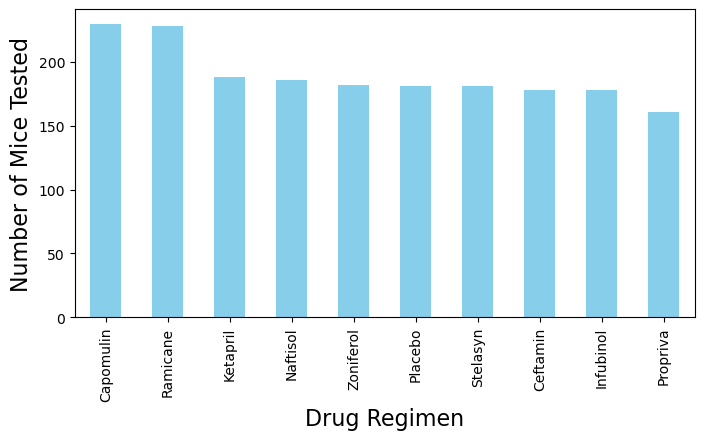

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
DataFrame = merging_mice.groupby("Drug Regimen")["Timepoint"].count()
DataFrame = DataFrame.sort_values(ascending=False)
DataFrame.plot(kind="bar", figsize=(8,4), color="skyblue")
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Number of Mice Tested", fontsize=16)
plt.show()

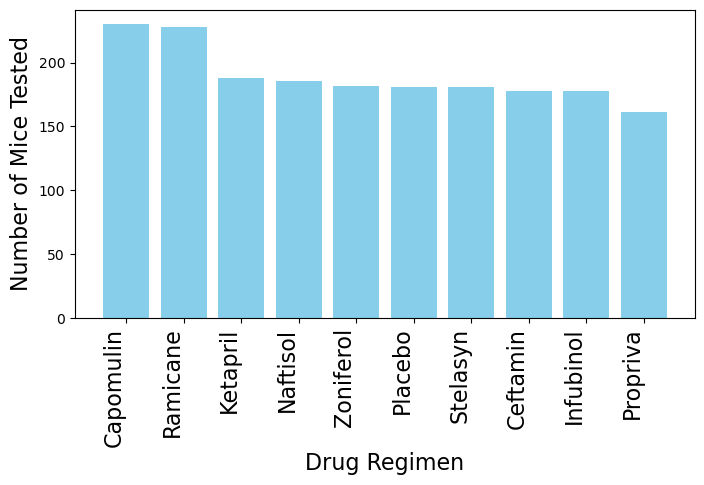

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = merging_mice.groupby("Drug Regimen")["Timepoint"].count()
timepoints = timepoints.sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(timepoints.index, timepoints.values, color="skyblue")
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Number of Mice Tested", fontsize=16)
plt.xticks(rotation=90, ha="right", fontsize=16)
plt.show()

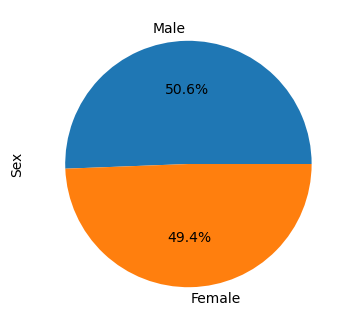

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merging_mice["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%",figsize=(4,4))
plt.show()

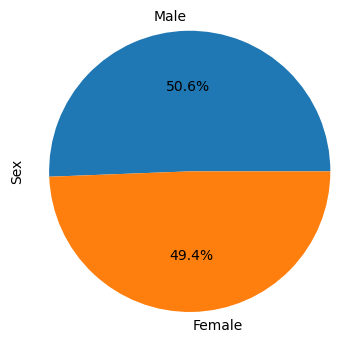

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = merging_mice["Sex"].value_counts()
colors = ["#1f77b4", "#ff7f0e"]
plt.figure(figsize=(4, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, colors=colors, 
        autopct="%1.1f%%")
plt.ylabel("Sex", fontsize=10)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_mice = merging_mice[merging_mice["Drug Regimen"].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_mice.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(max_timepoints, merging_mice, on=["Mouse ID", "Timepoint"])
last_tumor_volume = last_tumor_volume[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_tumor_volume.loc[last_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset 
    tumor_volume_data.append(tumor_volume)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [x for x in tumor_volume if x < lower_bound or x > upper_bound]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


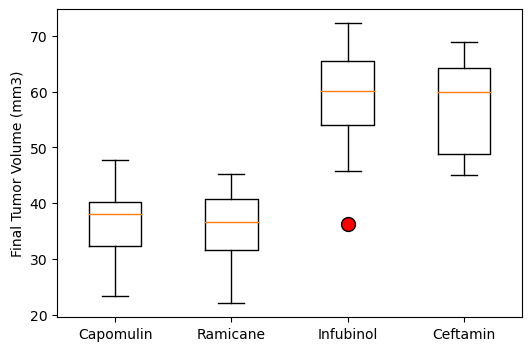

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(tumor_volume_data, showfliers=True, flierprops={'markerfacecolor': 'red', 'marker': 'o', 'markersize': 10})
ax.set_xticklabels(treatments)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

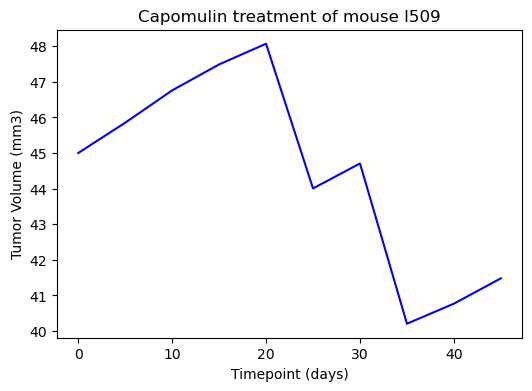

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = merging_mice[merging_mice["Drug Regimen"] == "Capomulin"]
mouse_id = "l509"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color="blue")
ax.set_title(f"Capomulin treatment of mouse {mouse_id}")
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

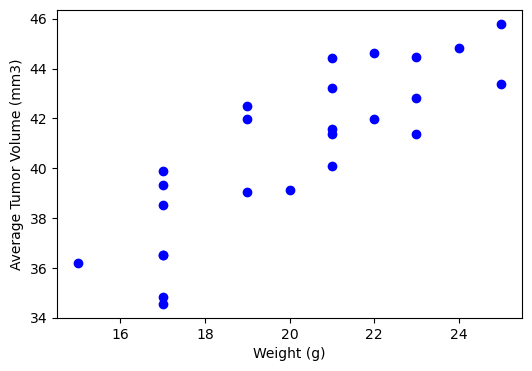

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = merging_mice[merging_mice["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.figure(figsize=(6, 4))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", facecolors="blue",)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


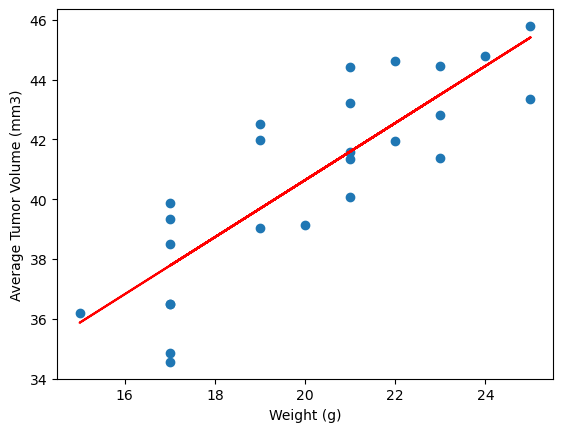

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_data = merging_mice[merging_mice["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()